In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from natsort import natsorted
%matplotlib inline

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', size=12) 
%config InlineBackend.figure_format = 'svg'

In [2]:
path = '/Users/patrick/Documents/phd/GitHub/tikhonov/'
g4iso_files = natsorted(glob.glob(path+"g4out/*KE_*_iso.csv"))

g4iso = np.zeros((2000,len(g4iso_files)))
for i in range(0,len(g4iso_files)-1):
    g4iso[:,i] =  np.loadtxt(open(g4iso_files[i], "r"), delimiter=",",skiprows=9)[:,3]
    

In [33]:
g4iso_files[100]

'/Users/patrick/Documents/phd/GitHub/tikhonov/g4out/h1_photon_KE_histogram_atm_slc_34_1010_keV_iso.csv'

In [3]:
bergerSeltzer0 = np.loadtxt(open('berger_seltzer_brem_402_309_km_spectra.csv', "r"), delimiter=",")
bergerSeltzer1 = np.loadtxt(open('berger_seltzer_brem_351_304_km_spectra.csv', "r"), delimiter=",")
bergerSeltzer2 = np.loadtxt(open('berger_seltzer_brem_322_315_km_spectra.csv', "r"), delimiter=",")
bergerSeltzer_E0 = np.array([2000,1000,500,200,100,30]) # electron beam energies
bergerSeltzer_E = bergerSeltzer0[:,0]                   # photon energy bins

barrel = np.loadtxt(open("barrel.csv", "r"), delimiter=",")

g4iso_files_30km = natsorted(glob.glob("g4out_30km/*KE_*_iso.csv"))
g4iso_30km = np.zeros((2000,len(g4iso_files_30km)))
for i in range(0,len(g4iso_files_30km)-1):
    g4iso_30km[:,i] =  np.loadtxt(open(g4iso_files_30km[i], "r"), delimiter=",",skiprows=9)[:,3]

g4iso_files_34km = natsorted(glob.glob("g4out_34km/*KE_*_iso.csv"))
g4iso_34km = np.zeros((2000,len(g4iso_files_34km)))
for i in range(0,len(g4iso_files_34km)-1):
    g4iso_34km[:,i] =  np.loadtxt(open(g4iso_files_34km[i], "r"), delimiter=",",skiprows=9)[:,3]

g4iso_files_40km = natsorted(glob.glob("g4out_40km/*KE_*_iso.csv"))
g4iso_40km = np.zeros((2000,len(g4iso_files_40km)))
for i in range(0,len(g4iso_files_40km)-1):
    g4iso_40km[:,i] =  np.loadtxt(open(g4iso_files_40km[i], "r"), delimiter=",",skiprows=9)[:,3]



In [117]:
test = np.loadtxt(open('10.csv','r'), delimiter=',',skiprows=9)[:,3]
test_all = np.loadtxt(open('KE2.csv','r'), delimiter=',',skiprows=9)[:,3]

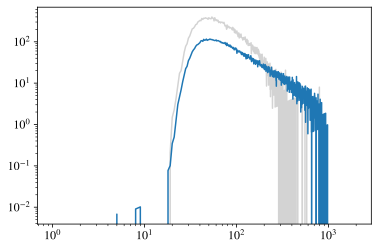

In [118]:
plt.loglog(test*10,color='lightgrey')
plt.loglog(g4iso_34km[:,4])
#plt.semilogy(test_all/45)

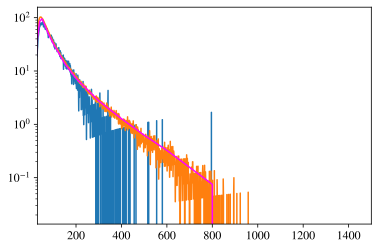

In [119]:
plt.xlim([30,1500])

#plt.loglog(barrel[1000,:]*6000, label="1000 keV",zorder=1)
plt.semilogy(test*2.1)
#plt.loglog(g4iso_34km[:,4]*.9)
plt.semilogy(g4iso[:,101]/18.0)
plt.semilogy(bergerSeltzer_E,bergerSeltzer1[:,2]*250000,label="2000 keV",color='magenta')



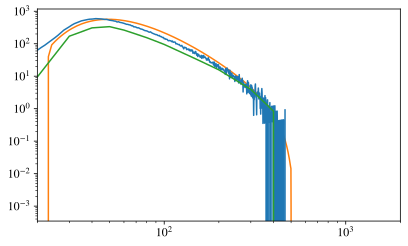

In [32]:
fig = plt.figure(figsize=(6.52437527778,9))
gs = plt.GridSpec(nrows=2, ncols=1,hspace=.3)
ax = fig.add_subplot(gs[0, 0])

ax.set_xlim([20,2000])


#ax.plot(g4iso_30km[:,1])
#ax.plot(g4iso_30km[:,2])
#ax.plot(g4iso_30km[:,3])
#ax.plot(g4iso_30km[:,4])

ax.loglog(g4iso[:,50])
ax.loglog(barrel[500,:]*99000, label="1000 keV",zorder=1)
ax.loglog(bergerSeltzer_E,bergerSeltzer1[:,3]*2800000,label="2000 keV")
#ax.plot(g4iso_34km[:,4])


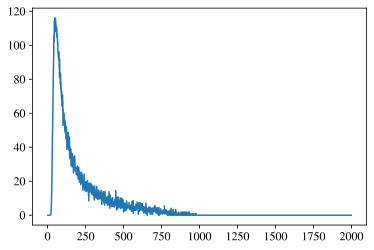

In [ ]:
ax.loglog(g4iso[:,99]/5000000,color='lightgrey')
ax.loglog(bergerSeltzer_E,bergerSeltzer1[:,2],label="1000 keV")

ax.loglog(g4iso[:,49]/5000000,color='lightgrey')
ax.loglog(bergerSeltzer_E,bergerSeltzer1[:,3],label="500 keV")

ax.loglog(g4iso[:,19]/5000000,color='lightgrey')
ax.loglog(bergerSeltzer_E,bergerSeltzer1[:,4],label="200 keV")

ax.loglog(g4iso[:,9]/5000000,color='lightgrey')
ax.loglog(bergerSeltzer_E,bergerSeltzer1[:,5],label="100 keV")

ax.loglog(bergerSeltzer_E,bergerSeltzer1[:,6],label="50 keV")
ax.loglog(g4iso[:,4]/5000000,color='lightgrey',label='GEANT4')

ax1.loglog(barrel[999,:]/50, label="1000 keV", color='#ff7f0e',zorder=1)

ax1.loglog(barrel[500,:]/50, label="500 keV", color='#2ca02c',zorder=1)
ax1.loglog(g4iso[:,99]/5000000,color='lightgrey',zorder=0)

ax1.loglog(barrel[200,:]/50, label="200 keV", color='#d62728',zorder=1)
ax1.loglog(g4iso[:,49]/5000000,color='lightgrey',zorder=0)

ax1.loglog(barrel[100,:]/50,label="100 keV", color='#9467bd',zorder=1)
ax1.loglog(g4iso[:,9]/5000000,color='lightgrey',zorder=0,label="GEANT 4")

ax.set_ylabel("$\Phi_0/j_0~~({keV})^{-1}$")
ax1.set_ylabel("$\Phi_0/j_0~~({keV})^{-1}$")
ax.set_xlabel("X-ray Energy (keV)")
ax.set_title("Berger and Seltzer (1972)")
ax1.set_title("BARREL Team SPEDAS Model")

ax1.set_xlabel("X-ray Energy (keV)")
#fig.subplots_adjust(top=1.8)
ax1.legend(loc='best',bbox_to_anchor=(1, .8))
ax.legend(loc='best',bbox_to_anchor=(1, .8))
fig.tight_layout()


fig.savefig('barrel_berger_spedas_comparison_alt_40km_3.pdf', bbox_inches='tight')

No handles with labels found to put in legend.


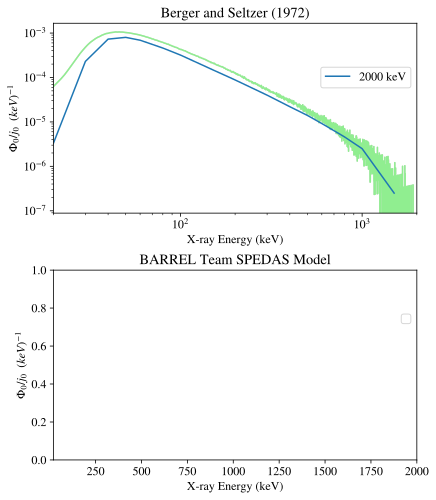

In [98]:
fig = plt.figure(figsize=(6.52437527778,9))
gs = plt.GridSpec(nrows=2, ncols=1,hspace=.3)
ax = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

ax.set_xlim([20,2000])
ax1.set_xlim([20,2000])

bergerSeltzer_E2 = bergerSeltzer1[:,0]                   # photon energy bins

ax.loglog(g4iso_32[:,-2]/5000000,color='lightgrey')
ax.loglog(g4iso[:,-2]/5000000,color='lightgreen')

ax.loglog(bergerSeltzer_E2[:-1],bergerSeltzer2[:,1],label="2000 keV")


ax.set_ylabel("$\Phi_0/j_0~~({keV})^{-1}$")
ax1.set_ylabel("$\Phi_0/j_0~~({keV})^{-1}$")

ax.set_xlabel("X-ray Energy (keV)")
ax.set_title("Berger and Seltzer (1972)")
ax1.set_title("BARREL Team SPEDAS Model")

ax1.set_xlabel("X-ray Energy (keV)")
fig.subplots_adjust(top=0.8)

ax1.legend(loc='best',bbox_to_anchor=(1, .8))
ax.legend(loc='best',bbox_to_anchor=(1, .8))
fig.savefig('barrel_berger_spedas_comparison_alt_35km_3.pdf', bbox_inches='tight')

In [110]:
g4iso_33[:,19] - g4iso[:,19]

array([0., 0., 0., ..., 0., 0., 0.])

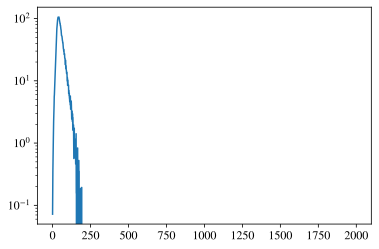

In [108]:
plt.semilogy(g4iso[:,19])

In [101]:
g4iso

array([[6.42819e-03, 3.63704e-03, 5.06187e-03, ..., 7.08561e-01,
        6.92285e-01, 0.00000e+00],
       [2.74738e-03, 1.30026e-02, 2.46617e-02, ..., 2.26468e+00,
        2.28117e+00, 0.00000e+00],
       [1.32547e-02, 2.82770e-02, 4.59607e-02, ..., 4.11353e+00,
        4.16221e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])